# Explore the KDD Cup 1999 data set

Here we explore the [KDD Cup 1999](https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) 
data set, accessing it using the 
[fetch_kddcup99](https://scikit-learn.org/stable/datasets/real_world.html#kddcup-99-dataset) 
function provided by sklearn.datasets.

We just look at the `http` feature.

In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_kddcup99

---
## Import the data and check what it contains

In [2]:
# import a 10% subset of the data
kdd = fetch_kddcup99(subset="http", percent10=True)

In [3]:
kdd.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
# check what target values are present
target_values = sorted(list(set(kdd["target"])))
target_values

[b'back.', b'ipsweep.', b'normal.', b'phf.', b'satan.']

In [5]:
# Target / y data
dft = pd.DataFrame(kdd["target"], columns=["target"])
dft.head()

,target
0,b'normal.'
1,b'normal.'
2,b'normal.'
3,b'normal.'
4,b'normal.'


In [6]:
label_map = {label: str(label, "utf-8") for label in target_values}
target_values = label_map.values()
label_map

{b'back.': 'back.',
 b'ipsweep.': 'ipsweep.',
 b'normal.': 'normal.',
 b'phf.': 'phf.',
 b'satan.': 'satan.'}

In [7]:
dft["target"].replace(label_map, inplace=True)
dft.head()

,target
0,normal.
1,normal.
2,normal.
3,normal.
4,normal.


In [8]:
# Feature / X data
dfd = pd.DataFrame(kdd["data"], columns=kdd["feature_names"])
dfd

,duration,src_bytes,dst_bytes
0,-2.302585,5.199049,8.603389
1,-2.302585,5.476882,6.186414
2,-2.302585,5.460011,7.198258
3,-2.302585,5.389528,7.198258
4,-2.302585,5.380358,7.616825
...,...,...,...
58720,-2.302585,5.736895,7.539612
58721,-2.302585,5.642262,7.734603
58722,-2.302585,5.313698,7.09016
58723,-2.302585,5.673667,7.09016


In [9]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58725 entries, 0 to 58724
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   duration   58725 non-null  object
 1   src_bytes  58725 non-null  object
 2   dst_bytes  58725 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [10]:
# Sanity check that X and y have the same length
print(dft.shape)
print(dfd.shape)

(58725, 1)
(58725, 3)


---
## Visualise the data

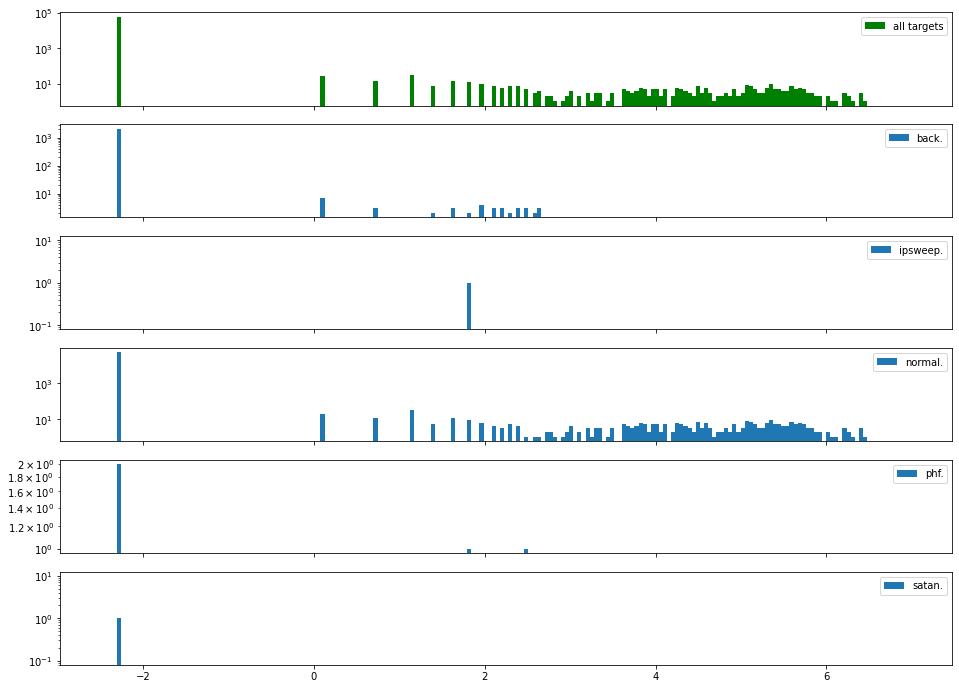

In [11]:
# Plot each of the features:
# duration

field = "duration"
fig, ax = plt.subplots(len(target_values) + 1, 1, figsize=(16, 12), sharex=True)
bins = np.linspace(-2.5, 7, 200)
ax[0].hist(dfd[field], bins=bins, color="green", label="all targets")
ax[0].set_yscale("log")
ax[0].legend(loc="upper right")

for ti, target in enumerate(target_values):
    ax[ti + 1].hist(dfd[dft["target"] == target][field], bins=bins, label=target)
    ax[ti + 1].set_yscale("log")
    ax[ti + 1].legend(loc="upper right")

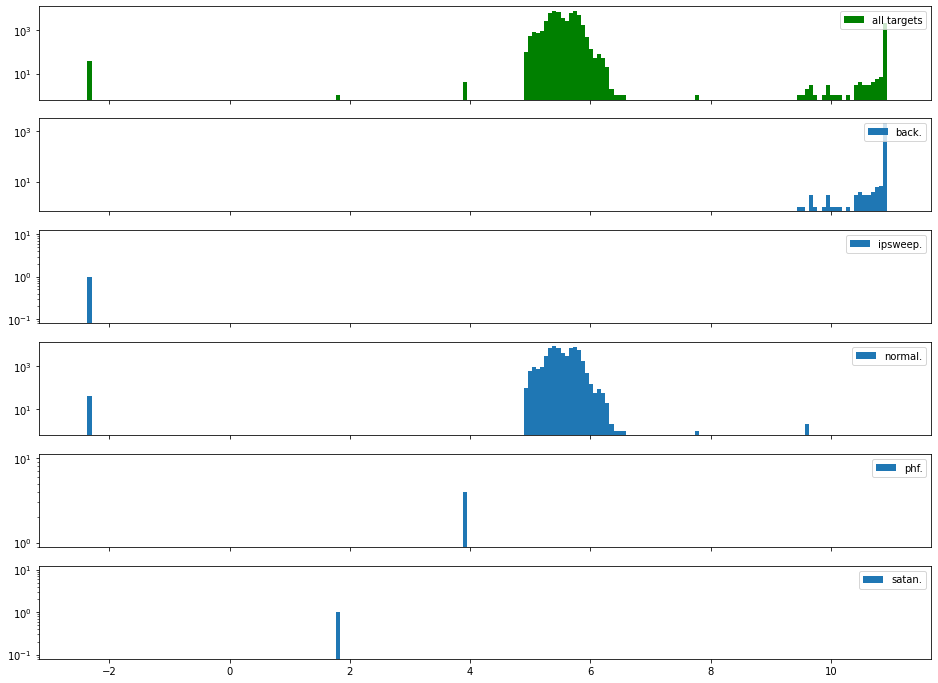

In [12]:
# Plot each of the features:
# src_bytes

field = "src_bytes"
fig, ax = plt.subplots(len(target_values) + 1, 1, figsize=(16, 12), sharex=True)
bins = np.linspace(-2.5, 11, 200)
ax[0].hist(dfd[field], bins=bins, color="green", label="all targets")
ax[0].set_yscale("log")
ax[0].legend(loc="upper right")

for ti, target in enumerate(target_values):
    ax[ti + 1].hist(dfd[dft["target"] == target][field], bins=bins, label=target)
    ax[ti + 1].set_yscale("log")
    ax[ti + 1].legend(loc="upper right")

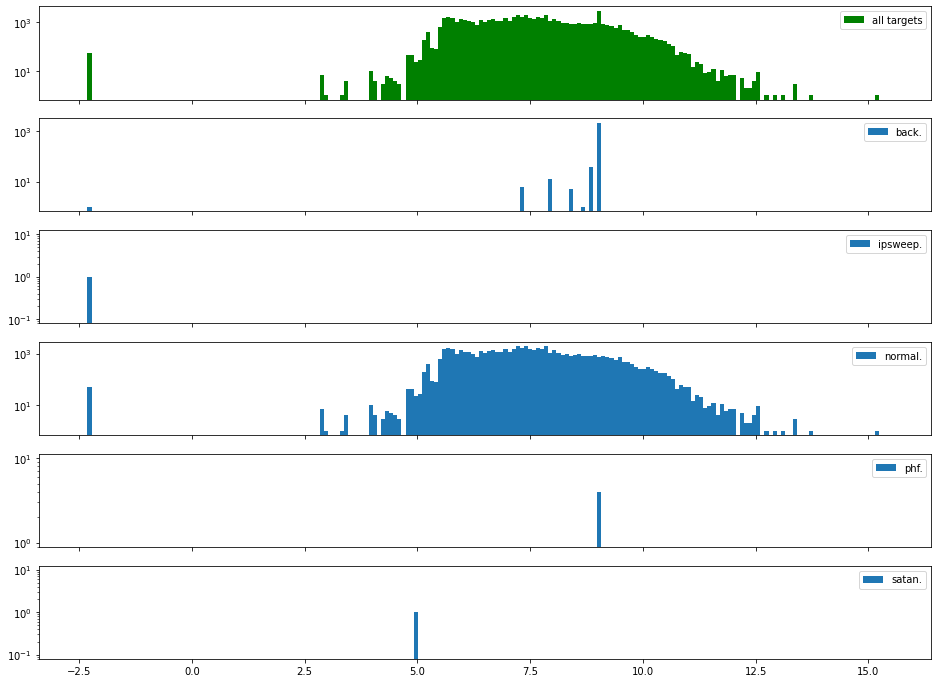

In [13]:
# Plot each of the features:
# dst_bytes

field = "dst_bytes"
fig, ax = plt.subplots(len(target_values) + 1, 1, figsize=(16, 12), sharex=True)
bins = np.linspace(-2.5, 15.5, 200)
ax[0].hist(dfd[field], bins=bins, color="green", label="all targets")
ax[0].set_yscale("log")
ax[0].legend(loc="upper right")

for ti, target in enumerate(target_values):
    ax[ti + 1].hist(dfd[dft["target"] == target][field], bins=bins, label=target)
    ax[ti + 1].set_yscale("log")
    ax[ti + 1].legend(loc="upper right")

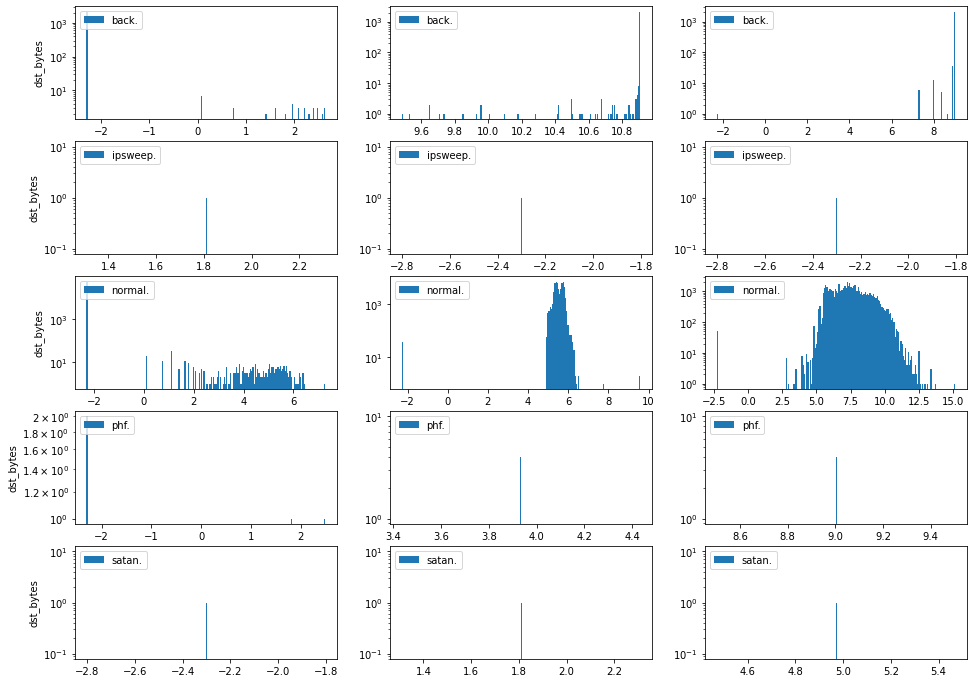

In [14]:
# Plot the histograms for each target side by side
fig, ax = plt.subplots(len(target_values), 3, figsize=(16, 12))
for ti, target in enumerate(target_values):
    ax[ti, 0].hist(dfd[dft["target"] == target]["duration"], bins=200, label=target)
    ax[ti, 0].set_yscale("log")
    ax[ti, 0].set_ylabel("duration")
    ax[ti, 0].legend(loc="upper left")

    ax[
        ti,
        1,
    ].hist(dfd[dft["target"] == target]["src_bytes"], bins=200, label=target)
    ax[ti, 1].set_yscale("log")
    ax[ti, 0].set_ylabel("src_bytes")
    ax[ti, 1].legend(loc="upper left")

    ax[
        ti,
        2,
    ].hist(dfd[dft["target"] == target]["dst_bytes"], bins=200, label=target)
    ax[ti, 2].set_yscale("log")
    ax[ti, 0].set_ylabel("dst_bytes")
    ax[ti, 2].legend(loc="upper left")

In [15]:
# Add y value to feature data for pairplot
dfd["y"] = dft["target"].values

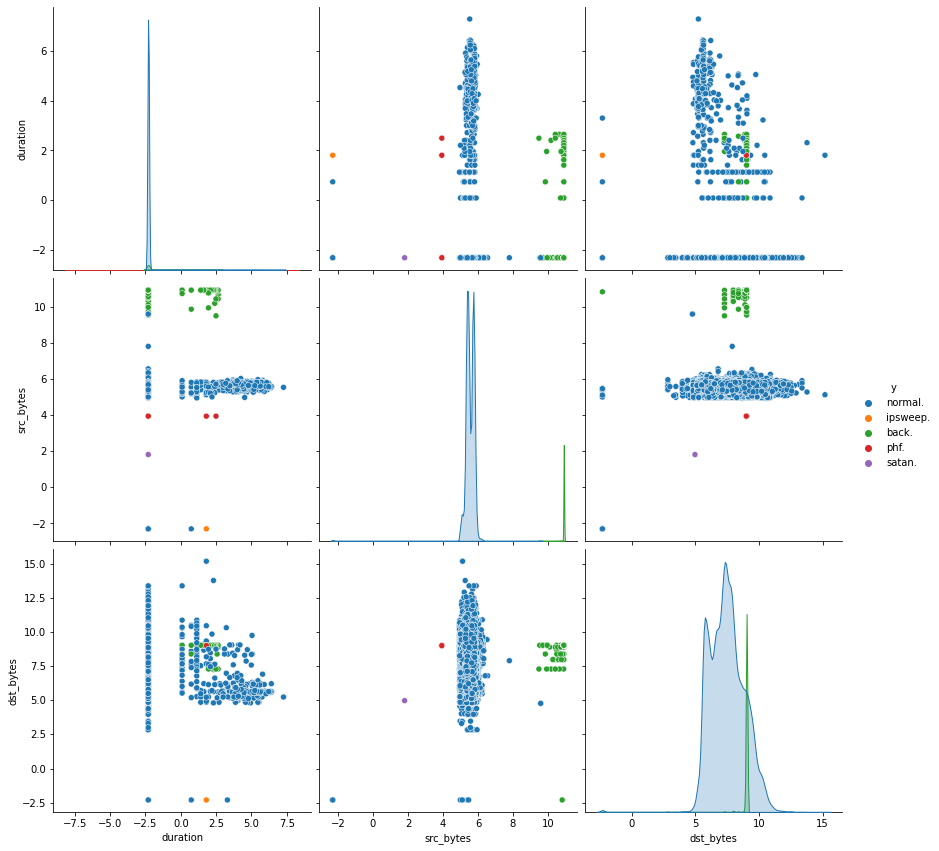

In [16]:
# Plot a pairplot for all features
sns.pairplot(dfd, height=4, hue="y", palette="tab10")